<a href="https://colab.research.google.com/github/fizzzaj-07/Task2_Customer_Segmentation/blob/main/Task_2.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
import pandas as pd
import kagglehub

path = kagglehub.dataset_download("yasserh/customer-segmentation-dataset")

df = pd.read_excel(path + "/Online Retail.xlsx")
df.head()

100%|██████████| 21.8M/21.8M [00:00<00:00, 194MB/s]

Extracting files...


,InvoiceNo,StockCode,Description,Quantity,InvoiceDate,UnitPrice,CustomerID,Country
0,536365,85123A,WHITE HANGING HEART T-LIGHT HOLDER,6,2010-12-01 08:26:00,2.55,17850.0,United Kingdom
1,536365,71053,WHITE METAL LANTERN,6,2010-12-01 08:26:00,3.39,17850.0,United Kingdom
2,536365,84406B,CREAM CUPID HEARTS COAT HANGER,8,2010-12-01 08:26:00,2.75,17850.0,United Kingdom
3,536365,84029G,KNITTED UNION FLAG HOT WATER BOTTLE,6,2010-12-01 08:26:00,3.39,17850.0,United Kingdom
4,536365,84029E,RED WOOLLY HOTTIE WHITE HEART.,6,2010-12-01 08:26:00,3.39,17850.0,United Kingdom


In [ ]:
# Remove missing CustomerID
df = df.dropna(subset=['CustomerID'])

# Remove negative or zero quantities
df = df[df['Quantity'] > 0]

df.head()

,InvoiceNo,StockCode,Description,Quantity,InvoiceDate,UnitPrice,CustomerID,Country
0,536365,85123A,WHITE HANGING HEART T-LIGHT HOLDER,6,2010-12-01 08:26:00,2.55,17850.0,United Kingdom
1,536365,71053,WHITE METAL LANTERN,6,2010-12-01 08:26:00,3.39,17850.0,United Kingdom
2,536365,84406B,CREAM CUPID HEARTS COAT HANGER,8,2010-12-01 08:26:00,2.75,17850.0,United Kingdom
3,536365,84029G,KNITTED UNION FLAG HOT WATER BOTTLE,6,2010-12-01 08:26:00,3.39,17850.0,United Kingdom
4,536365,84029E,RED WOOLLY HOTTIE WHITE HEART.,6,2010-12-01 08:26:00,3.39,17850.0,United Kingdom


In [ ]:
df['InvoiceDate'] = pd.to_datetime(df['InvoiceDate'])
df.head()

,InvoiceNo,StockCode,Description,Quantity,InvoiceDate,UnitPrice,CustomerID,Country
0,536365,85123A,WHITE HANGING HEART T-LIGHT HOLDER,6,2010-12-01 08:26:00,2.55,17850.0,United Kingdom
1,536365,71053,WHITE METAL LANTERN,6,2010-12-01 08:26:00,3.39,17850.0,United Kingdom
2,536365,84406B,CREAM CUPID HEARTS COAT HANGER,8,2010-12-01 08:26:00,2.75,17850.0,United Kingdom
3,536365,84029G,KNITTED UNION FLAG HOT WATER BOTTLE,6,2010-12-01 08:26:00,3.39,17850.0,United Kingdom
4,536365,84029E,RED WOOLLY HOTTIE WHITE HEART.,6,2010-12-01 08:26:00,3.39,17850.0,United Kingdom


In [ ]:
import datetime as dt

# Snapshot date = last date + 1 day
snapshot_date = df['InvoiceDate'].max() + dt.timedelta(days=1)

# Group by CustomerID and calculate RFM
rfm = df.groupby('CustomerID').agg({
'InvoiceDate': lambda x: (snapshot_date - x.max()).days,
'InvoiceNo': 'nunique',
'UnitPrice': lambda x: (x * df.loc[x.index, 'Quantity']).sum()
})

# Rename columns
rfm.columns = ['Recency', 'Frequency', 'Monetary']

rfm.head()

,Recency,Frequency,Monetary
CustomerID,,,
12346.0,326,1,77183.60
12347.0,2,7,4310.00
12348.0,75,4,1797.24
12349.0,19,1,1757.55
12350.0,310,1,334.40


In [ ]:
from sklearn.preprocessing import StandardScaler

scaler = StandardScaler()
rfm_scaled = scaler.fit_transform(rfm)

In [ ]:
from sklearn.cluster import KMeans

kmeans = KMeans(n_clusters=4, random_state=42)
rfm['Cluster'] = kmeans.fit_predict(rfm_scaled)

rfm.head()

,Recency,Frequency,Monetary,Cluster
CustomerID,,,,
12346.0,326,1,77183.60,0
12347.0,2,7,4310.00,3
12348.0,75,4,1797.24,3
12349.0,19,1,1757.55,3
12350.0,310,1,334.40,1


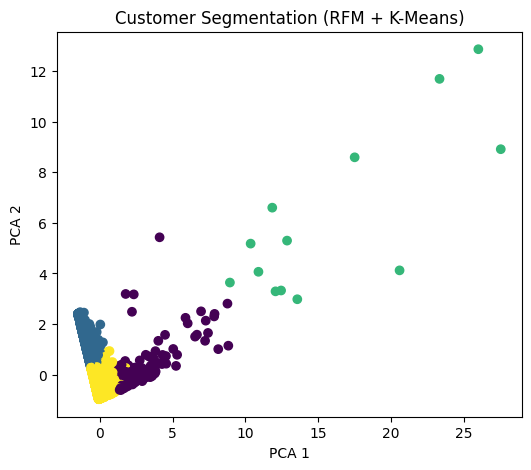

In [ ]:
from sklearn.decomposition import PCA
import matplotlib.pyplot as plt

pca = PCA(n_components=2)
pca_data = pca.fit_transform(rfm_scaled)

plt.figure(figsize=(6,5))
plt.scatter(pca_data[:,0], pca_data[:,1], c=rfm['Cluster'])
plt.xlabel('PCA 1')
plt.ylabel('PCA 2')
plt.title('Customer Segmentation (RFM + K-Means)')
plt.show()

 Summary

In this task, we successfully segmented customers based on their purchasing behavior using RFM analysis and K-Means clustering. The analysis identified distinct customer groups, including high-value loyal customers, regular customers, and low-engagement customers.  

These insights can help businesses design targeted marketing campaigns, improve customer retention, and optimize revenue. This task demonstrates practical skills in data cleaning, feature engineering, clustering, and business-oriented interpretation of results.